In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import sympy
from scipy.stats import probplot
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Point 1

## **Subpoint a**

In [52]:
Housing = pd.read_csv('Housing.csv')
Housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## **Subpoint b**

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

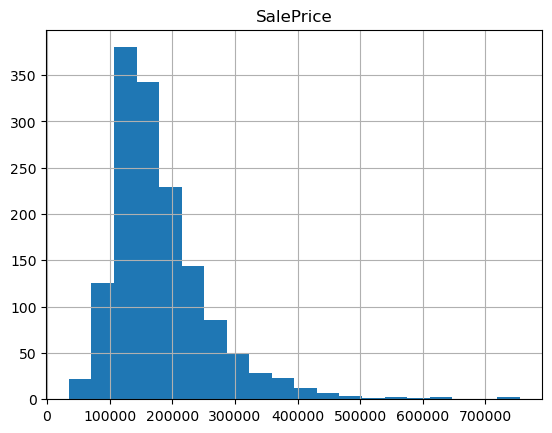

In [55]:
Housing.hist(column = "SalePrice",bins = 20)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512989))

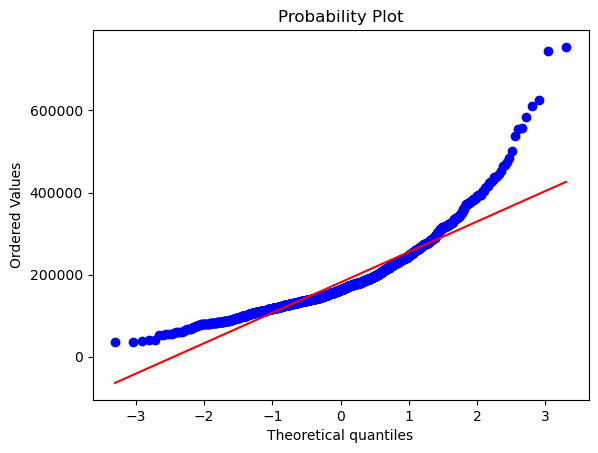

In [56]:
probplot(Housing['SalePrice'], dist="norm", plot=plt)

As we can see both at the histogram of the sale prices and on theirs QQ-Plot, sale prices do not follow gaussian distribution. We will now try to normalize them using Box-Cox transformation.


In [58]:
Housing['SalePriceTrans'], _ = boxcox(Housing['SalePrice'])

array([[<Axes: title={'center': 'SalePriceTrans'}>]], dtype=object)

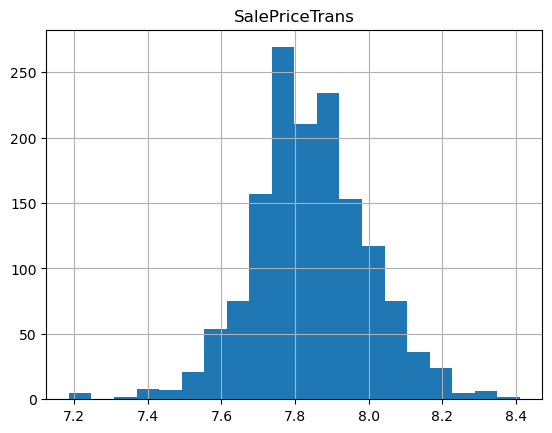

In [59]:
Housing.hist(column = "SalePriceTrans",bins = 20)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([7.18570211, 7.19093599, 7.22246733, ..., 8.34295923, 8.40545244,
         8.41016236])),
 (0.1578108212718165, 7.842252009506654, 0.9955315707916031))

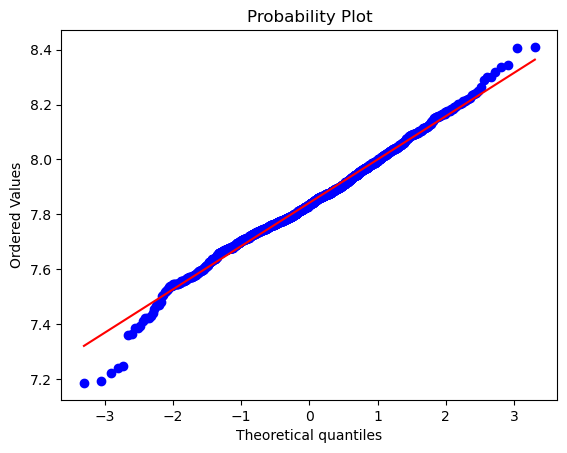

In [60]:
probplot(Housing['SalePriceTrans'], dist="norm", plot=plt)

We can see that after applying Box-Cox transformation to our data, transformed datas histogram resembles a normal distribution. On the QQ-Plot, however, we can see that it still doesn't follow gaussian distribution perfectly since the "edges" of the distribution drive apart from the theoretical normal distribution.

## **Subpoint c**

In [64]:
h = Housing

In [67]:
non_categorical_cols = Housing.select_dtypes(exclude=['object']).columns
categorical_cols = Housing.select_dtypes(include=['object']).columns
Housing[non_categorical_cols] = Housing[non_categorical_cols].fillna(Housing[non_categorical_cols].mean())

In [68]:
Housing = pd.get_dummies(Housing,  columns=categorical_cols, dtype= float)

## **Subpoint d**

In [75]:
Housing2 = h[non_categorical_cols]

# **Point 2**

## **Subpoint a**

Let's first set a seed so that we will be able to replicate our results after rerunning the calculations.

In [80]:
rd.seed(213742069)

Then let's use the function from sklearn to divide data frame into two.

In [83]:
Housing_train, Housing_test = train_test_split(Housing2, test_size=0.3, random_state=213742069)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePriceTrans
245,246,20,80.000000,10400,7,5,1988,1988,102.0,929,...,39,0,0,0,0,0,6,2006,241500,7.989560
347,348,20,70.049958,17600,6,5,1960,1960,30.0,1270,...,40,0,0,0,0,0,12,2009,157500,7.822080
1337,1338,30,153.000000,4118,4,4,1941,1950,0.0,0,...,20,0,0,0,0,0,3,2006,52500,7.365487
1277,1278,80,70.049958,17871,6,5,1967,1976,359.0,528,...,0,0,0,0,0,0,6,2009,197900,7.912231
606,607,20,82.000000,12464,5,5,1996,1996,0.0,732,...,0,0,0,0,0,0,11,2009,152000,7.807903


## **Subpoint b**

Now we want to train our model. For that we need to establish which variable is the target variable. That is the price of the property. Since we've already created a transformed variable that has a distribution closer to the gaussian distribution we will set it to be the target variables. All other variables (except for course for the non transformed price) will be used to explain it.

In [98]:
X_train = Housing_train.drop(['SalePriceTrans','SalePrice',"Id"], axis=1)
y_train = Housing_train['SalePriceTrans']
X_test = Housing_test.drop(['SalePriceTrans','SalePrice',"Id"], axis=1)
y_test = Housing_test['SalePriceTrans']

Now we build the linear regression model on the training data. Just after that we read the coefficients of obtained model.

In [99]:
mod = LinearRegression()
mod.fit(X_train, y_train)
coef = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': mod.coef_})
print(coef)

          Feature   Coefficient
0      MSSubClass -2.461759e-04
1     LotFrontage -1.232236e-04
2         LotArea  7.608337e-07
3     OverallQual  3.384551e-02
4     OverallCond  2.037270e-02
5       YearBuilt  1.350052e-03
6    YearRemodAdd  4.720696e-04
7      MasVnrArea  2.213048e-06
8      BsmtFinSF1  3.088951e-06
9      BsmtFinSF2  9.366521e-07
10      BsmtUnfSF  8.789715e-06
11    TotalBsmtSF  1.281532e-05
12       1stFlrSF  2.423277e-05
13       2ndFlrSF  1.782630e-05
14   LowQualFinSF  7.803979e-06
15      GrLivArea  4.986304e-05
16   BsmtFullBath  3.238135e-02
17   BsmtHalfBath  1.172674e-02
18       FullBath  1.119888e-02
19       HalfBath  3.654475e-03
20   BedroomAbvGr  2.456193e-03
21   KitchenAbvGr -1.256639e-02
22   TotRmsAbvGrd  5.778655e-03
23     Fireplaces  1.980411e-02
24    GarageYrBlt -2.193673e-04
25     GarageCars  2.885329e-02
26     GarageArea -1.072163e-06
27     WoodDeckSF  4.909548e-05
28    OpenPorchSF -4.250110e-05
29  EnclosedPorch  6.979373e-05
30      

Now we want to establish the quality of the model we produced. For that we calculate MSE and R^2. To calculate these values we first need to see what are the predictions of our model. To evaluate both MSE and R^2 we use functions from sklearn package.

In [101]:
y_pred_train = mod.predict(X_train)
y_pred_test = mod.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'In-sample MSE: {mse_train:.2f}, R2: {r2_train:.2f}')
print(f'Out-of-sample MSE: {mse_test:.2f}, R2: {r2_test:.2f}')

In-sample MSE: 0.00, R2: 0.85
Out-of-sample MSE: 0.00, R2: 0.88


## **Subpoint c**

### **Subsubpoint 1**

We now want to calculate vector **β** of the coefficients. For that we first need to create the matrix **A** representing the observations of independent variables and one row responsible for taking into consideration the intercept.

In [102]:
A = np.c_[np.ones(X_train.shape[0]), X_train]

Now all is left is to save the dependent variable and use the formula.

In [103]:
y = y_train
beta = np.linalg.inv(A.T @ A) @ A.T @ y

In [106]:
beta

array([-2.56002144e+04, -5.51268368e-01, -6.43206843e+00,  4.25801140e-03,
       -1.84695567e+02, -6.94095657e+01, -1.46123570e+00,  1.52104582e+01,
        8.42014642e-02,  3.73752885e+12,  3.73752885e+12,  3.73752885e+12,
       -3.73752885e+12, -1.52825633e-01, -1.59870620e-01, -2.33507280e-01,
        2.76091210e-01,  3.23813521e-02,  1.17267415e-02,  1.11988806e-02,
        3.65447499e-03,  2.45619316e-03, -1.25663946e-02,  5.77865450e-03,
        1.98041071e-02, -2.19367294e-04,  2.88532874e-02, -1.07216324e-06,
        4.90954819e-05, -4.25011043e-05,  6.97937304e-05,  1.31862010e-04,
        1.62223679e-04, -1.31963702e-04, -1.57785910e-06,  5.53057449e-04,
       -3.83972578e-03])